In [33]:
# get all prop and to get the miniest noise and best FM
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['font.size'] = 16  # 可以调整这个值来设置字体大小

N0, T0, FM0 = 64.4282,2.05,0.5944

process_x = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process.npy"
process_FM = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process_FM.npy"
process_N = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process_N.npy"
process_T = "/home/sh/WCY/auto_propeller/resource5/2_output/optimization/process_T.npy"

process_x = np.load(process_x)
process_FM = np.load(process_FM)
process_N = np.load(process_N)
process_T = np.load(process_T)



(0.5944, 0.6217490434646606, 0.6275086402893066, 0.6285790205001831, 0.6292394995689392, 0.6295433044433594, 0.629711389541626, 0.629708468914032, 0.6297109127044678, 0.6297857165336609, 0.6297435760498047, 0.6297528147697449, 0.6297619342803955, 0.6296546459197998, 0.6295961141586304, 0.6297546625137329, 0.6297918558120728, 0.6297881603240967, 0.6297883987426758, 0.6297918558120728, 0.6297897100448608, 0.6297918558120728, 0.6297918558120728, 0.6296766996383667, 0.6297893524169922, 0.6297918558120728)


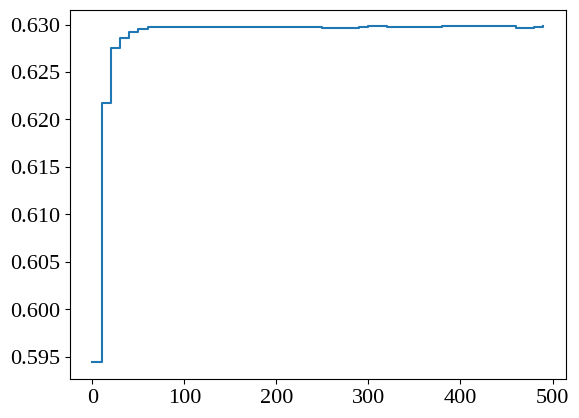

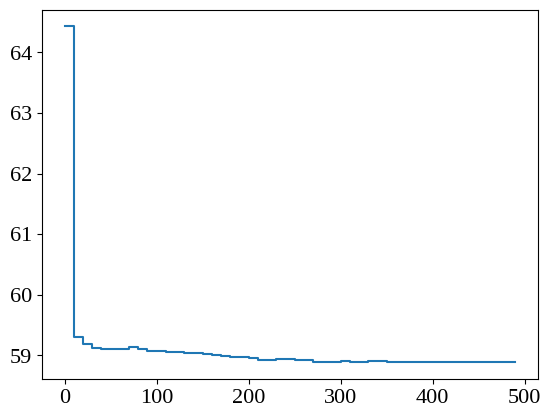

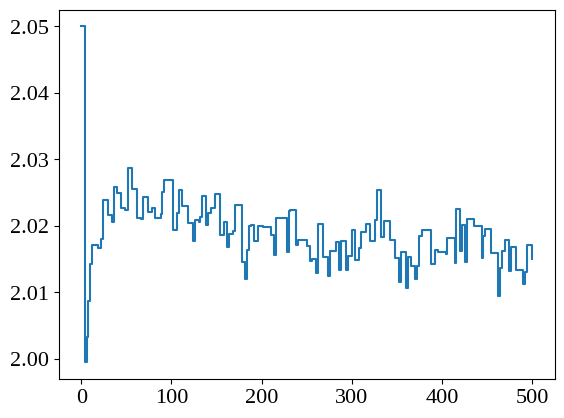

In [30]:
def filter_increasing(data):
    # 确保第一个元素总是被包括
    filtered = [(0, data[0])]
    # 从第二个元素开始过滤
    filtered.extend([(i * step, data[i]) for i in range(1, len(data)) if data[i] > data[i-1]])
    return filtered

def filter_decreasing(data):
    # 确保第一个元素总是被包括
    filtered = [(0, data[0])]
    # 从第二个元素开始过滤
    filtered.extend([(i * step, data[i]) for i in range(1, len(data)) if data[i] < data[i-1]])
    return filtered


step = 10

y0_raw = np.max(process_FM, 1)[::step]
y1_raw = np.min(process_N, 1)[::step]
y2_raw = np.mean(process_T, 1)[::2] - 0.3

y0_raw = np.append([FM0], y0_raw)
y1_raw = np.append([N0], y1_raw)
y2_raw = np.append([T0], y2_raw)

# 应用过滤并保持索引
y0_filtered = filter_increasing(y0_raw)
y1_filtered = filter_decreasing(y1_raw)

step = 2
y2_filtered = filter_increasing(y2_raw)

# 分解过滤后的数据为 x 和 y 列表
x0, y0 = zip(*y0_filtered) if y0_filtered else ([], [])
x1, y1 = zip(*y1_filtered) if y1_filtered else ([], [])
x2, y2 = zip(*y2_filtered) if y2_filtered else ([], [])

# 绘图
matplotlib.rcParams['font.family'] = 'Liberation Serif'

print(y0)
plt.step(x0, y0, where='post')
plt.show()

plt.step(x1, y1, where='post')
plt.show()

plt.step(x2, y2, where='post')
plt.show()


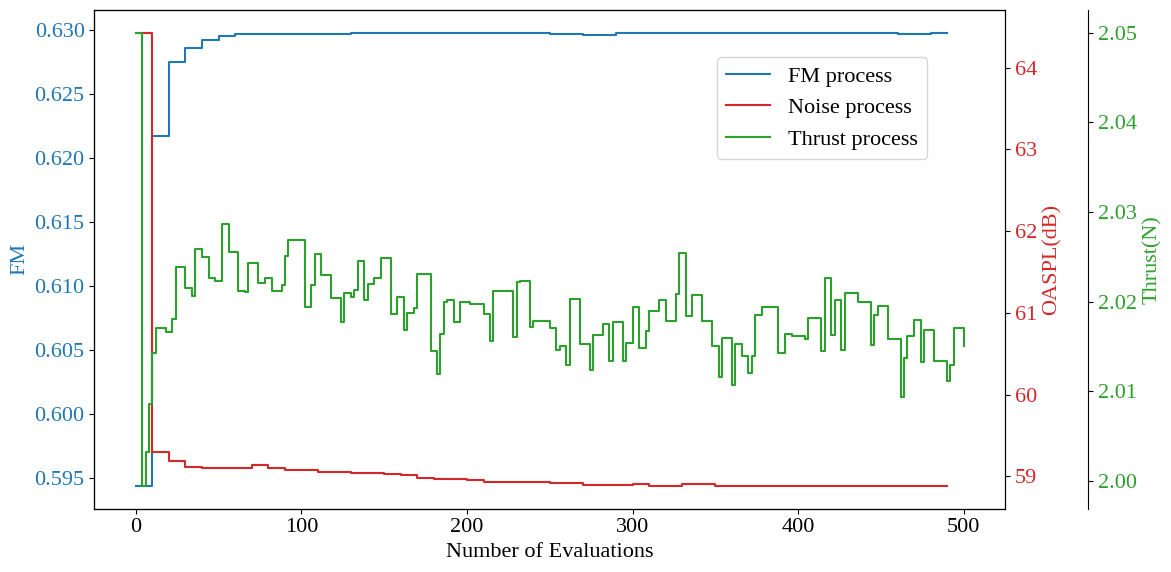

In [32]:


fig, ax1 = plt.subplots(figsize=(12,6))

# 绘制 y0 使用原始 y 轴
ax1.set_xlabel('Number of Evaluations')
ax1.set_ylabel('FM', color='tab:blue')
line1, = ax1.step(x0, y0, where='post', color='tab:blue',label="FM process")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 创建共享 x 轴的第二个 y 轴用于 y1
ax2 = ax1.twinx()
ax2.set_ylabel('OASPL(dB)', color='tab:red')
line2, = ax2.step(x1, y1, where='post', color='tab:red',label="Noise process")
ax2.tick_params(axis='y', labelcolor='tab:red')

# 创建第三个 y 轴用于 y2
ax3 = ax1.twinx()
# 调整第三个 y 轴的位置以避免与第二个 y 轴重叠
ax3.spines['right'].set_position(('outward', 60))  # 向右偏移60点
ax3.set_ylabel('Thrust(N)', color='tab:green')
line3, = ax3.step(x2, y2, where='post', color='tab:green',label="Thrust process")
ax3.tick_params(axis='y', labelcolor='tab:green')

fig.legend(handles=[line1, line2, line3], loc='upper left', bbox_to_anchor=(0.6,0.9))

fig.tight_layout()  # 调整布局以避免标签重叠

plt.savefig("optimization process.pdf")
plt.show()